<h1 style="text-align: center;">WSI - przeszukiwanie </h1>

### 1. Rysowanie wykresów funkcji f i g:

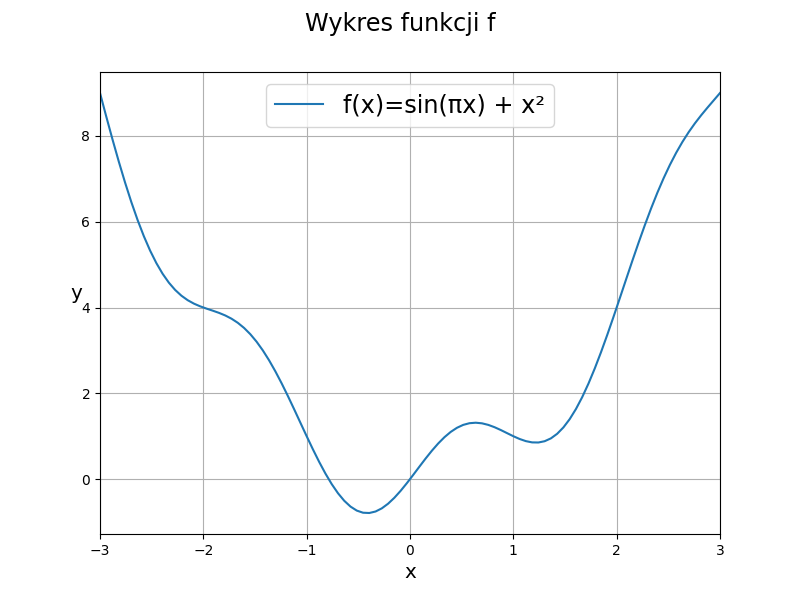

In [1]:
%matplotlib ipympl

from matplotlib import pyplot as plt
from plotting import plot_2d
import numpy as np
from solver import Function, Experiment

F_LINSPACE = np.linspace(-3, 3, 100)

f = Function(
    lambda x: np.sin(np.pi * x) + x**2, 
    lambda x: np.pi * np.cos(np.pi * x) + 2 * x,
    2, (-10, 10)
    )  

plot_2d(F_LINSPACE, f.f, "f(x)=sin(πx) + x²", "Wykres funkcji f")

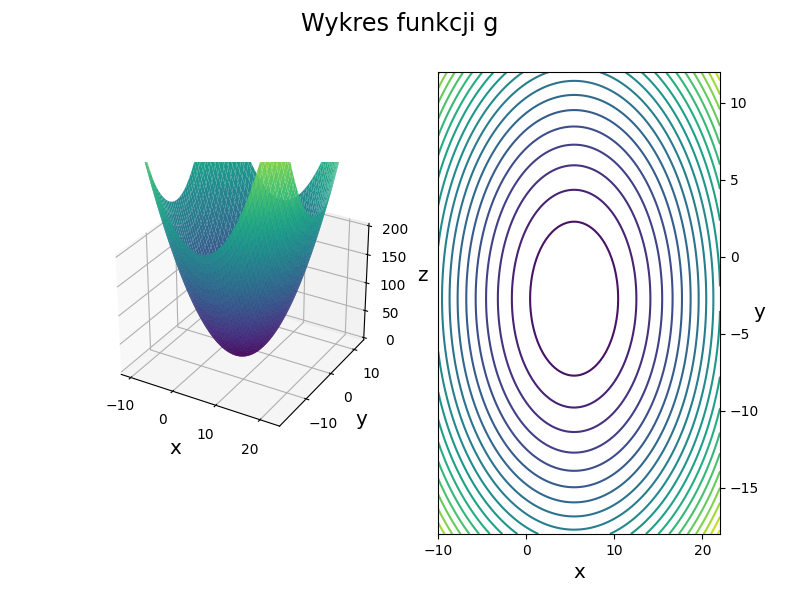

In [2]:
from plotting import plot_3d

G_LINSPACEX = np.linspace(-10, 22, 100)
G_LINSPACEY = np.linspace(-18, 12, 100)

g = Function(
    lambda x1, x2: 5*np.exp(2) - 4*np.exp(1)*x1 + x1**2 + 2*np.exp(1)*x2 + x2**2,
    lambda x1, x2: np.array([-4*np.exp(1) + 2*x1, 2*np.exp(1) + 2*x2]),
    3, ((0, 12), (-8, 2))
)

plot_3d(G_LINSPACEX, G_LINSPACEY, g.f, "Wykres funkcji g")

Łatwiejsza do optymalizacji będzie funkcja g, ponieważ posiada ona tylko jedno minimum lokalne będące równocześnie jej minimum globalnym. Funkcja f posiada dwa minima lokalne zatem znalezienie minimum globalnego będzie w dużej mierze zależało od wyboru punktu startowego. Optymalizując funkcję g, zakładając dobry wybór parametru kroku, zawsze znajdziemy jej minimum globalne.

### 2. Optymalizacja funkcji przy użyciu algorytmu najszybszego spadku:

Algorytm został zaimplementowany w pliku *gradien_descent.py*.


#### - Optymalizacja funcji f

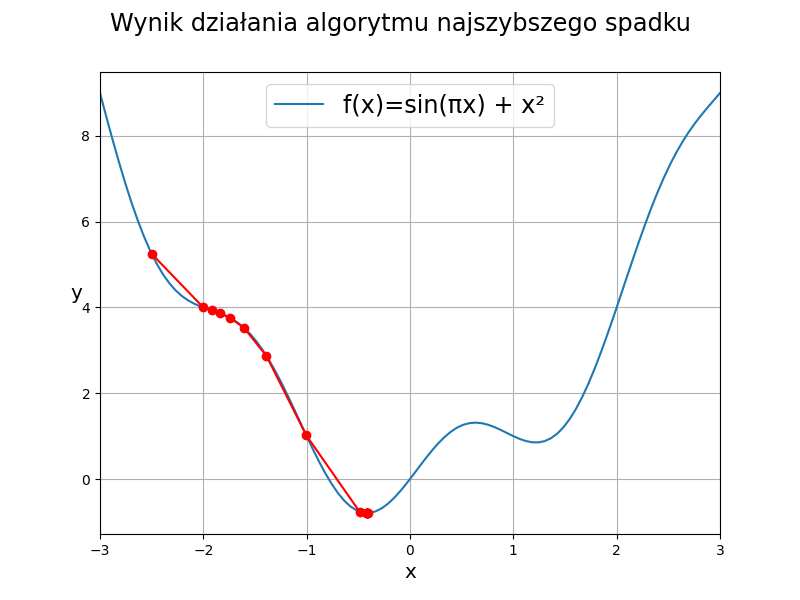

Minimum funkcji f: -0.7923324634710966, w punkcie x = -0.4149116190542472


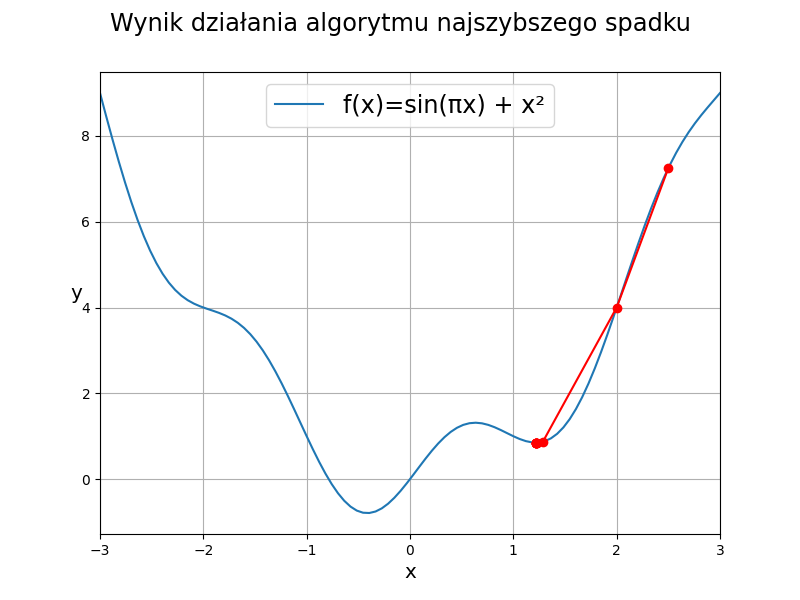

Minimum funkcji f: 0.8509533532099885, w punkcie x = 1.217656929166939


In [3]:
STARTING_POINT1 = np.array([-2.5])
STARTING_POINT2 = np.array([2.5])
LEARNING_RATE = 0.1
PRECISION = 1e-6
MAX_ITERATIONS = 1000

exp1 = Experiment(f, STARTING_POINT1, LEARNING_RATE, PRECISION, MAX_ITERATIONS)
result1 = exp1.conduct()

exp2 = Experiment(f, STARTING_POINT2, LEARNING_RATE, PRECISION, MAX_ITERATIONS)
result2 = exp2.conduct()

plot_2d(F_LINSPACE, f.f, "f(x)=sin(πx) + x²", "Wynik działania algorytmu najszybszego spadku", result1.path_to_min)
print(f"Minimum funkcji f: {f.f(*result1.minimum)}, w punkcie x = {result1.minimum[0]}")

plot_2d(F_LINSPACE, f.f, "f(x)=sin(πx) + x²", "Wynik działania algorytmu najszybszego spadku", result2.path_to_min)
print(f"Minimum funkcji f: {f.f(*result2.minimum)}, w punkcie x = {result2.minimum[0]}")


#### - Optymalizacja funkcji g

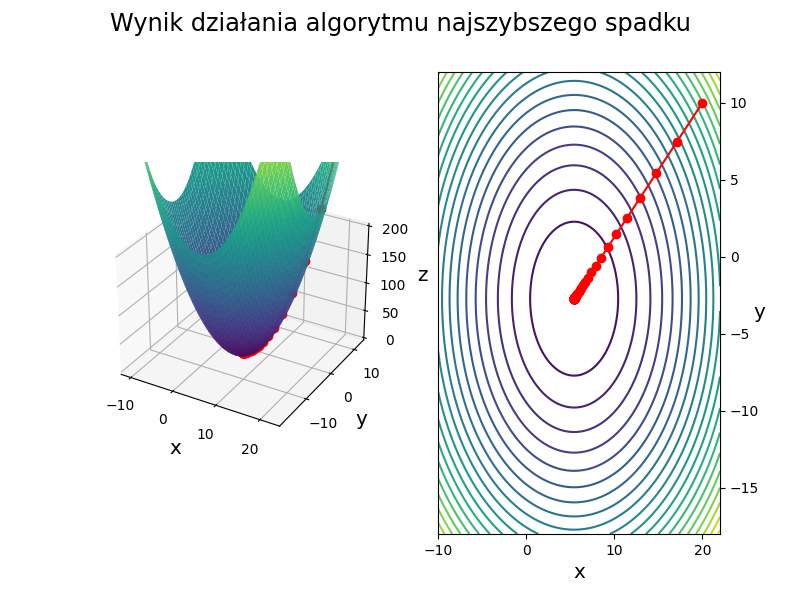

Minimum funkcji g: 1.8918200339612667e-13, w punkcie x = (5.43656397856015, -2.718281547568309)


In [4]:
STARTING_POINT = np.array([20, 10])
LEARNING_RATE = 0.1
PRECISION = 1e-6
MAX_ITERATIONS = 1000

exp3 = Experiment(g, STARTING_POINT, LEARNING_RATE, PRECISION, MAX_ITERATIONS)
result = exp3.conduct()

plot_3d(G_LINSPACEX, G_LINSPACEY, g.f, "Wynik działania algorytmu najszybszego spadku", result.path_to_min)
print(f"Minimum funkcji g: {g.f(*result.minimum)}, w punkcie x = ({result.minimum[0]}, {result.minimum[1]})")

### 3. Badanie wpływu rozmiaru kroku dla różnych punktów początkowych:

- funkcja f

In [5]:
from solver import Solver
import pandas as pd

ITERATION_NUMBER = 1000
EXPERIMENTS_NUMBER = 1000
LEARNING_RATES = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9 ,1]
EXPECTED_F_GLOBAL_MIN = -0.7923324634710966

s1 = Solver(ITERATION_NUMBER, f, LEARNING_RATES)
s1.generate_experiments(EXPERIMENTS_NUMBER)
s1.solve()
results = s1.get_results_data()

Wyniki przeprowadzonych eksperymentów dla funkcj f:

In [6]:
from generate_tab_data import generate_table

df1 = generate_table(results, f, EXPECTED_F_GLOBAL_MIN).reset_index(drop=True)
df1

,parametr kroku,punkt początkowy,wynik działania algorytmu,czas trwania,liczba iteracji,czy znaleziono minimum globalne
0,0.001,[-1.5449287109587413],[-0.4149371987167121],0.013138,1000,Tak
1,0.001,[-0.6183317776671711],[-0.4149134067516737],0.017634,1000,Tak
2,0.001,[8.633241403390286],[1.312290646848324],0.016320,1000,Nie
3,0.001,[3.9613387945599943],[1.2207717579956405],0.015192,1000,Nie
4,0.001,[-6.019163289329876],[-1.7233835262233572],0.011620,1000,Nie
...,...,...,...,...,...,...
995,1.000,[-8.844813523966613],[-2983.1125340384383],0.016568,1000,Nie
996,1.000,[-5.096350399554526],[-3005.098562003394],0.028961,1000,Nie
997,1.000,[-5.7619821973505285],[-2997.1487328511184],0.014884,1000,Nie
998,1.000,[-8.145906381705537],[-2972.9706373484164],0.012923,1000,Nie


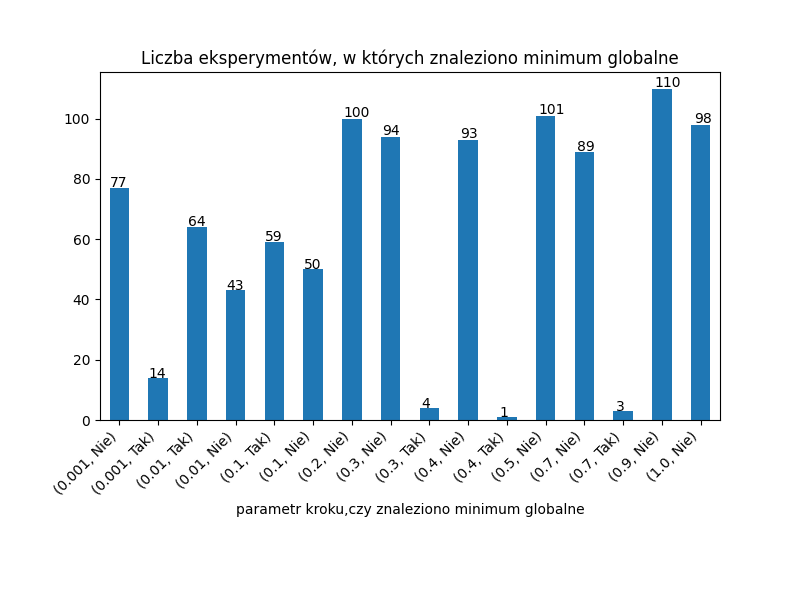

In [7]:
from generate_tab_data import plot_data

plot_data(df1)

- funkcja g

In [8]:
EXPECTED_G_GLOBAL_MIN =  1.8918200339612667e-13

s2 = Solver(ITERATION_NUMBER, g, LEARNING_RATES)
s2.generate_experiments(EXPERIMENTS_NUMBER)
s2.solve()
results2 = s2.get_results_data()


Wyniki przeprowadzonych eksperymentów dla funkcji g:

In [9]:
df2 = generate_table(results2, g, EXPECTED_G_GLOBAL_MIN,).reset_index(drop=True)
df2

,parametr kroku,punkt początkowy,wynik działania algorytmu,czas trwania,liczba iteracji,czy znaleziono minimum globalne
0,0.001,"[-2.601002979222156, 6.965140256298258]","[4.350973557574406, -1.4103950489316306]",0.020680,1000,Nie
1,0.001,"[-7.943297985073812, 7.5860016319707215]","[3.629419033839754, -1.3265387037208383]",0.026048,1000,Nie
2,0.001,"[-3.3596715815855545, 4.768576816534431]","[4.248504345100906, -1.7070728409471758]",0.018529,1000,Nie
3,0.001,"[-7.266610655489975, 8.73790867708751]","[3.720815484855717, -1.1709569287691683]",0.015269,1000,Nie
4,0.001,"[-5.946832337996005, 2.4610849702565964]","[3.8990707130435256, -2.0187331252143066]",0.015674,1000,Nie
...,...,...,...,...,...,...
995,1.000,"[-7.659350766603543, 2.8714964478964475]","[-7.659350766603545, 2.8714964478964475]",0.016942,1000,Nie
996,1.000,"[-4.245362657030687, 5.169759143173321]","[-4.2453626570306895, 5.169759143173321]",0.017404,1000,Nie
997,1.000,"[-3.0038612736239765, 9.198138779167937]","[-3.003861273623979, 9.198138779167937]",0.017439,1000,Nie
998,1.000,"[-0.04620438140042449, 8.250988827455998]","[-0.0462043814004236, 8.250988827455998]",0.015817,1000,Nie


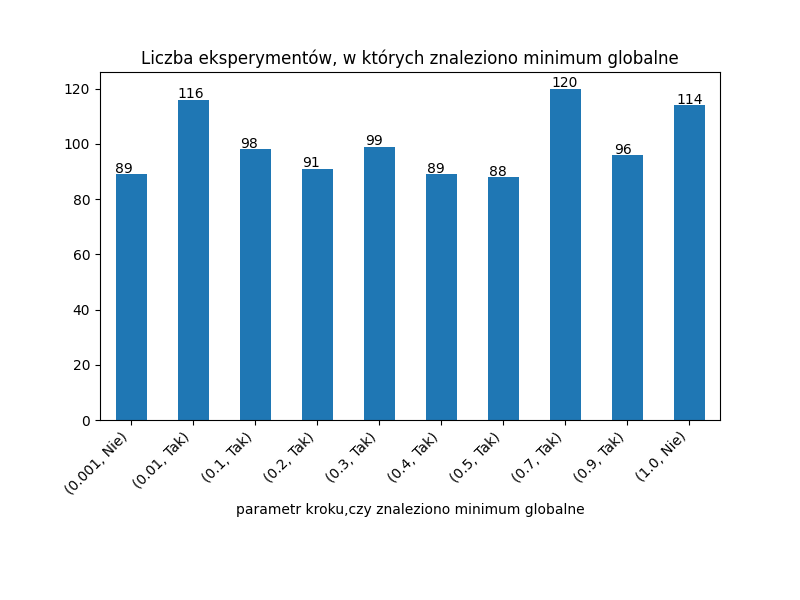

In [10]:
plot_data(df2)

Optymalizując funkcję g nie znajdujemy minimum globalnego przy parametrze kroku równym 0.001, wynika to z ograniczenia maksymalnej ilości iteracji algorytmu najszybszego spadku. Gdyby zwiększyć ten limit, minimum zostałoby odnalezione.

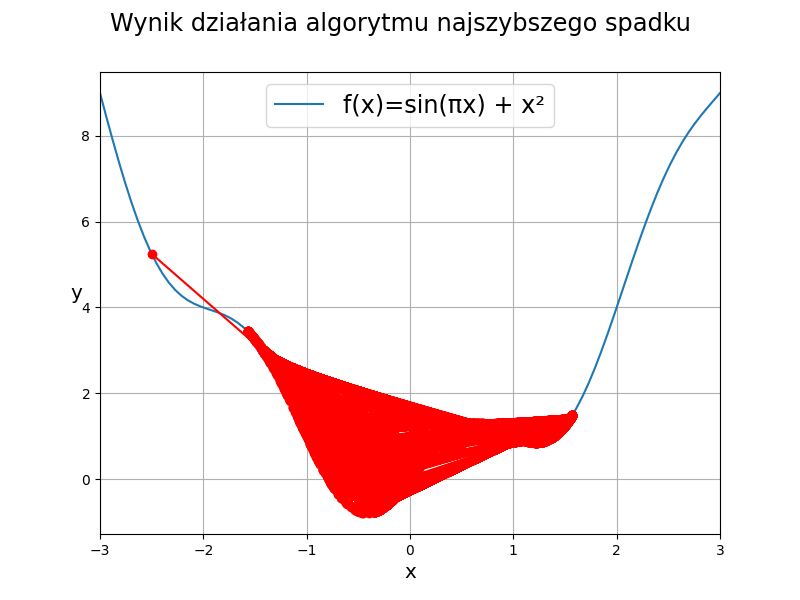

In [11]:
STARTING_POINT1 = np.array([-2.5])
STARTING_POINT2 = np.array([2.5])
LEARNING_RATE = 0.5
PRECISION = 1e-6
MAX_ITERATIONS = 1000

exp1 = Experiment(f, STARTING_POINT1, LEARNING_RATE, PRECISION, MAX_ITERATIONS)
result1 = exp1.conduct()

plot_2d(F_LINSPACE, f.f, "f(x)=sin(πx) + x²", "Wynik działania algorytmu najszybszego spadku", result1.path_to_min)

Jeżeli parametr kroku jest zbyt duży, to nie znajdziemy minimum lokalnego

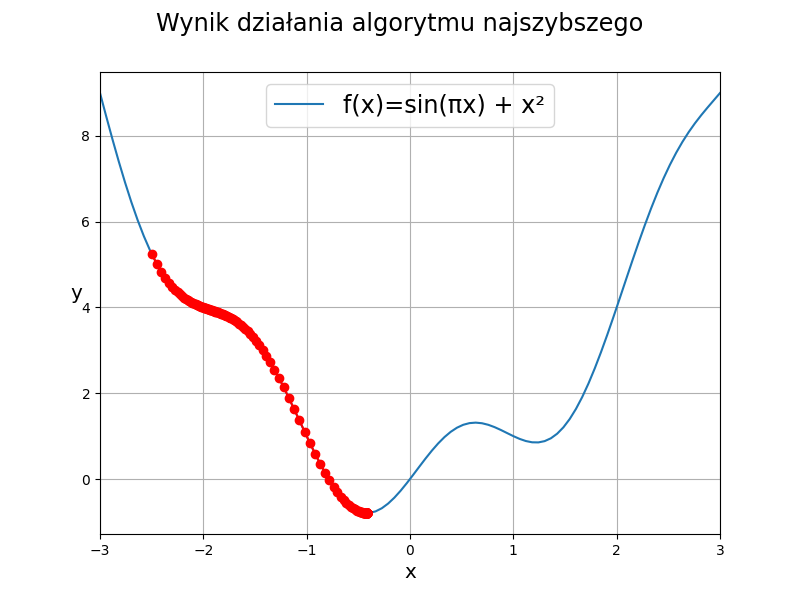

In [12]:
STARTING_POINT1 = np.array([-2.5])
STARTING_POINT2 = np.array([2.5])
LEARNING_RATE = 0.01
PRECISION = 1e-6
MAX_ITERATIONS = 1000

exp1 = Experiment(f, STARTING_POINT1, LEARNING_RATE, PRECISION, MAX_ITERATIONS)
result1 = exp1.conduct()

plot_2d(F_LINSPACE, f.f, "f(x)=sin(πx) + x²", "Wynik działania algorytmu najszybszego", result1.path_to_min)

Jeżeli parametr kroku jest zbyt mały, to potrzebna jest większa liczba iteracji

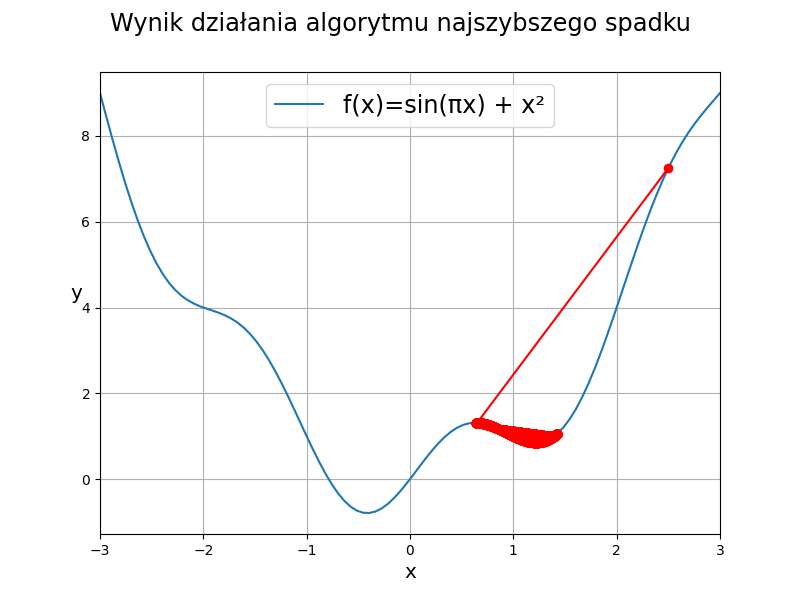

In [13]:
STARTING_POINT1 = np.array([-2.5])
STARTING_POINT2 = np.array([2.5])
LEARNING_RATE = 0.37
PRECISION = 1e-6
MAX_ITERATIONS = 1000

exp1 = Experiment(f, STARTING_POINT2, LEARNING_RATE, PRECISION, MAX_ITERATIONS)
result1 = exp1.conduct()

plot_2d(F_LINSPACE, f.f, "f(x)=sin(πx) + x²", "Wynik działania algorytmu najszybszego spadku", result1.path_to_min)

### Wnioski:
- Przeprowadzony eksperyment pokazał, że dobór odpowiedniego parametru kroku ma duży wpływ na efektywność algorytmu najszybszego spadku. Za mały parametr może prowadzić do zbyt dużej liczby iteracji potrzebnej na osiągnięcie minimum, natomiast zbyt duży może skutkować rozbieżnością, przeż co najmniejsza wartość nie będzie osiągalna.

- Skuteczność algorytmu zależy też od wyboru funkcji celu. W przeprowadzanych eksperymentach optymalizowałem dwie funkcje, jedna miała dwa minima lokalne, przez co dotarcie do minimum globalnego zależało w dużej mierze od wyboru punktu startowego. Natomiast druga, mimo że była funkcją dwóch zmiennych, posiadała jedno minimum lokalne będące równocześnie jej minimum globalnym. Dzięki temu dotarcie do ekstremum było możliwe dla większości parametrów kroku (algorytm przestawał działac dla parametru równego 1).

- Optymalizując funkcję f trzeba dokłaniej sprecyzować parameter kroku. Jak widzimy na wykresie algorytm kończył się powodzeniem najczęściej dla β = 0.01 lub β = 0.1. Natomiast w pozostałych przypadkach bardzo rzadko (lub wcale) znajdujemy minimum. Wynika to z istnienia dwóch minimów lokalnych.